In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
wine = pd.read_csv('/content/winequality-red.csv',sep=';')

In [ ]:
# Select relevant features for clustering
features = wine.columns[:-1]  # Exclude the 'quality' column
X = wine[features]

In [ ]:
# Confirm that X is a DataFrame with numeric data
if not X.empty and all(dtype in [np.dtype('float64'), np.dtype('int64')] for dtype in X.dtypes):
    # If checks pass, try scaling again
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
else:
    print("Error: X is empty or contains non-numeric data types.")

In clustering, it is counterintuitive to include the target variable such as "quality" in the features, since clustering is essentially an unsupervised learning technique. The goal here is to classify similar data points based on their intrinsic feature similarity, regardless of any labels.

Specifically, our goal for the wine dataset is to identify its intrinsic structure, independent of the "quality" label. Including "quality" as a feature would inadvertently inject label related information into the clustering, which contradicts our goal. Typically, in clustering, the target variable is omitted because the focus is on finding inherent patterns in the features themselves rather than patterns linked to pre-established labels.

Determining the Number of Clusters using the Elbow Method

In [ ]:
# Use MinMaxScaler to standardize the features to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determining the optimal number of clusters
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=43)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

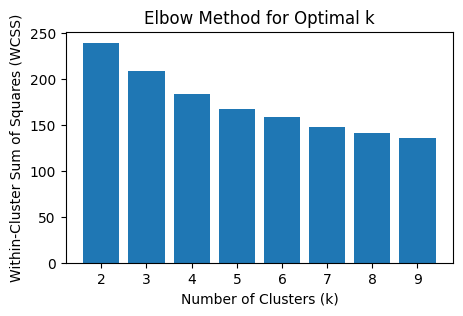

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(5, 3))
plt.bar(range(2, 10), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Applying K-Means Clustering

In [ ]:
# Apply K-Means clustering
optimal_k = 5  # Assuming the optimal number of clusters is 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=1000, n_init=10, random_state=43)
wine['cluster'] = kmeans.fit_predict(X_scaled)

Principal Component Analysis (PCA)

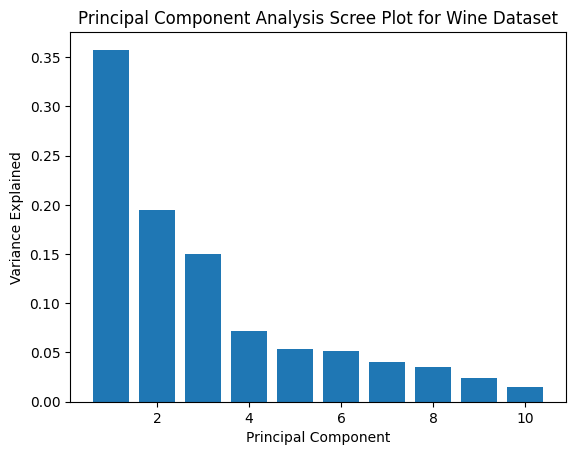

In [ ]:
# Perform PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(X_scaled)
pc_values = np.arange(pca_fit.n_components_) + 1
plt.bar(pc_values, pca.explained_variance_ratio_)
plt.title('Principal Component Analysis Scree Plot for Wine Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The scree plot in Principal Component Analysis (PCA) visually represents the explained variance by each principal component. The point in this plot, often referred to as the "elbow point," marks the ideal number of factors to keep. Beyond this point, additional factors contribute less significantly to the explained variance. In our specific analysis, identifying an elbow point at the fourth principal component implies that retaining these first four components suffices to account for a considerable amount of the variance present in the dataset.







In [ ]:
# Display the cumulative variance explained by the first four principal components
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2] + pca.explained_variance_ratio_[3]

0.7745608017933613

PCA Component Weights and Scores

In [ ]:
# PCA component weights
n_components_pca = 4
pca = PCA(n_components=n_components_pca)
principal_components = pca.fit(X_scaled)
pc_weights = pd.DataFrame(data=principal_components.components_, columns=features)
print(pc_weights)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.512287         -0.221240     0.661097        0.070862   0.071472   
1      -0.046458         -0.264580     0.235905       -0.078240  -0.082702   
2      -0.152124         -0.184033     0.205165        0.135775   0.000122   
3       0.335184          0.446595    -0.177839        0.445570  -0.140760   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.063738             -0.005407  0.329210 -0.330387   0.129135   
1            -0.255215             -0.261611 -0.407754  0.087728   0.059950   
2             0.744992              0.496789 -0.153096  0.031076   0.112178   
3             0.099190              0.001212  0.364914  0.125184  -0.163845   

    alcohol  
0 -0.055974  
1  0.740337  
2  0.208954  
3  0.502707  


In [ ]:
# PCA component scores
principal_component_scores = pca.transform(X_scaled)
pc_scores = pd.DataFrame(data=principal_component_scores, columns=[f'PC{i+1}' for i in range(n_components_pca)])
print(pc_scores)

           PC1       PC2       PC3       PC4
0    -0.271839 -0.195125 -0.190351  0.028252
1    -0.225848 -0.258617  0.017494  0.092883
2    -0.187260 -0.179955 -0.092509  0.041507
3     0.422279 -0.031881  0.038314 -0.078532
4    -0.271839 -0.195125 -0.190351  0.028252
...        ...       ...       ...       ...
1594 -0.337500 -0.031716  0.161494 -0.023517
1595 -0.344092  0.038897  0.297364  0.020498
1596 -0.246771  0.046616  0.163354 -0.007196
1597 -0.338070 -0.065408  0.163681 -0.031096
1598  0.004584  0.198450  0.158566 -0.112132

[1599 rows x 4 columns]


In [ ]:
# Add PCA scores to the original dataset
wine = wine.reset_index()
wine = pd.concat([wine, pc_scores], axis=1)

Visualizing Cluster Results

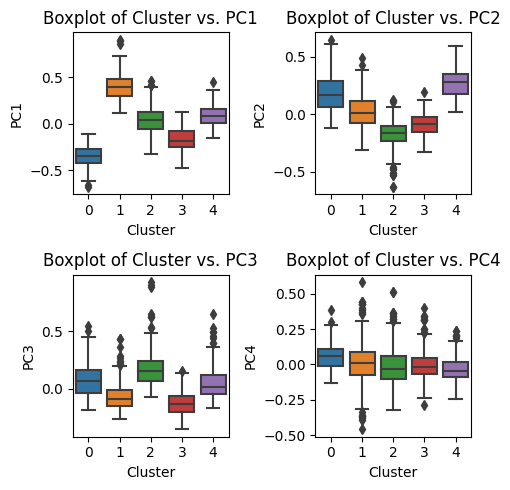

In [ ]:
# Create box plots with updated axes settings
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x="cluster", y=f'PC{i+1}', data=wine, ax=ax)
    ax.set_title(f'Boxplot of Cluster vs. PC{i+1}', fontsize=12)
    ax.set_xlabel('Cluster', fontsize=10)
    ax.set_ylabel(f'PC{i+1}', fontsize=10)
plt.tight_layout()
plt.show()

The box plot provides insight into how different clusters relate to the principal component in the wine dataset. Observing PC1, the median values across clusters reveal varied distributions. Cluster 1 stands out with a higher median value, suggesting its wines deviate positively along PC1. In contrast, Cluster 0 displays a lower median, indicative of a negative deviation. Meanwhile, Clusters 2, 3, and 4, with medians near zero, show a more neutral distribution along PC1. These patterns are significant since principal components are designed to capture key variations in data. It implies that Cluster 1's wines may have attributes causing a positive shift in PC1, likely linked to certain quality-affecting features.

Moving to PC2, Cluster 4 emerges with the highest median value, pointing to a positive deviation along PC2, whereas Cluster 2 has the lowest median, suggesting a negative deviation. The near-zero medians of Clusters 0, 1, and 3 imply a balanced distribution along PC2. Given that principal components reflect substantial data variability, these findings indicate unique characteristics within each cluster along PC2. Wines in Cluster 4, for instance, may have traits leading to a positive shift in PC2, possibly affecting specific quality aspects. This pattern of distribution and deviation is similarly applicable to PC3 and PC4.

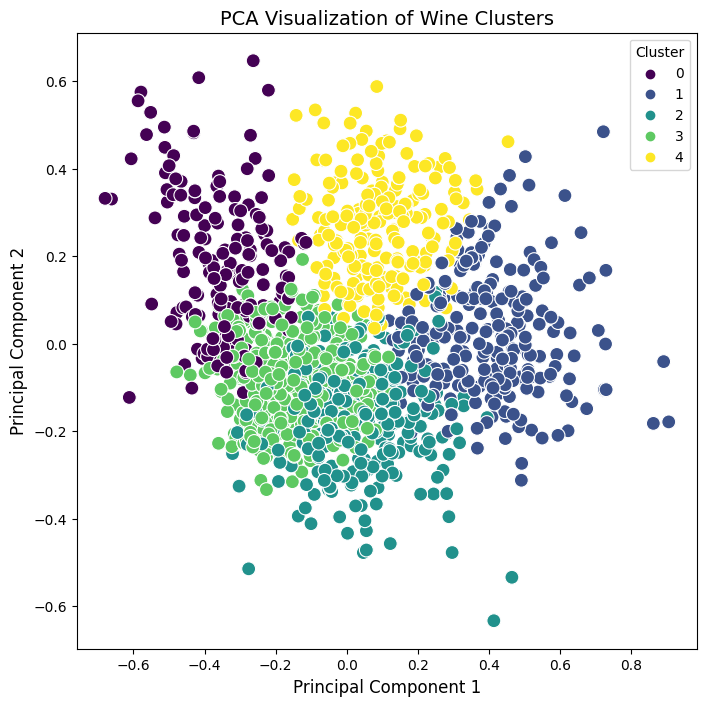

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster', data=wine,
    palette='viridis',
    s=100,
    legend='full'
)
plt.title('PCA Visualization of Wine Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [ ]:
cluster_means = wine.groupby('cluster').mean()
print(cluster_means)

               index  fixed acidity  volatile acidity  citric acid  \
cluster                                                              
0        1112.438776       6.414286          0.610128     0.086837   
1         597.973154      10.914765          0.418138     0.519161   
2         741.592375       8.227273          0.531364     0.301466   
3         728.494297       7.584411          0.636473     0.116217   
4        1030.655462       8.396639          0.352164     0.410210   

         residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
cluster                                                                         
0              2.248469   0.068128            19.173469             43.239796   
1              2.747987   0.108930            10.634228             32.000000   
2              3.079765   0.092059            27.343109             89.017595   
3              2.240779   0.085479            11.459125             35.332700   
4              2.399580

Analyzing the average quality ratings among the various clusters reveals that Cluster 4 stands out with the highest mean quality. This suggests that, on average, wines in this cluster are likely to be regarded as higher quality compared to those in other clusters. This observation indicates that specific attributes characteristic of Cluster 4, like sulfur content and alcohol concentration, might be positively influencing the overall perceived quality of wines in this group.

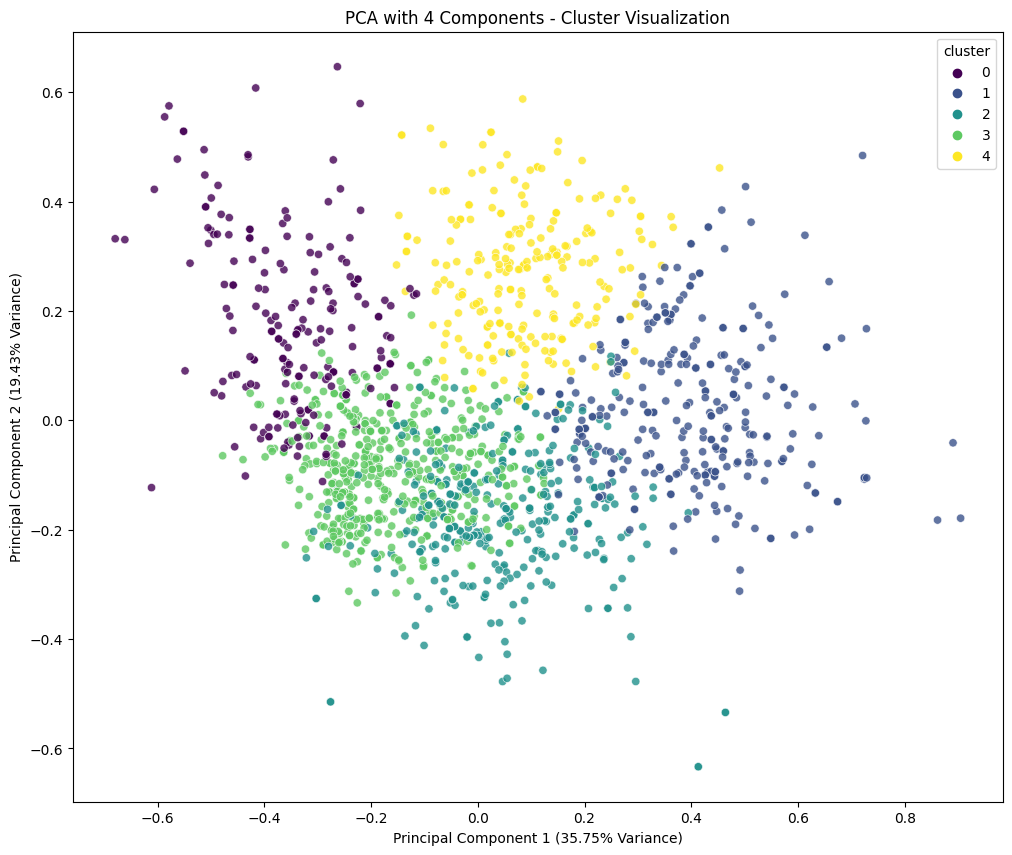

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=wine, palette='viridis', legend='full', alpha=0.8)
plt.title(f'PCA with {n_components_pca} Components - Cluster Visualization')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.show()

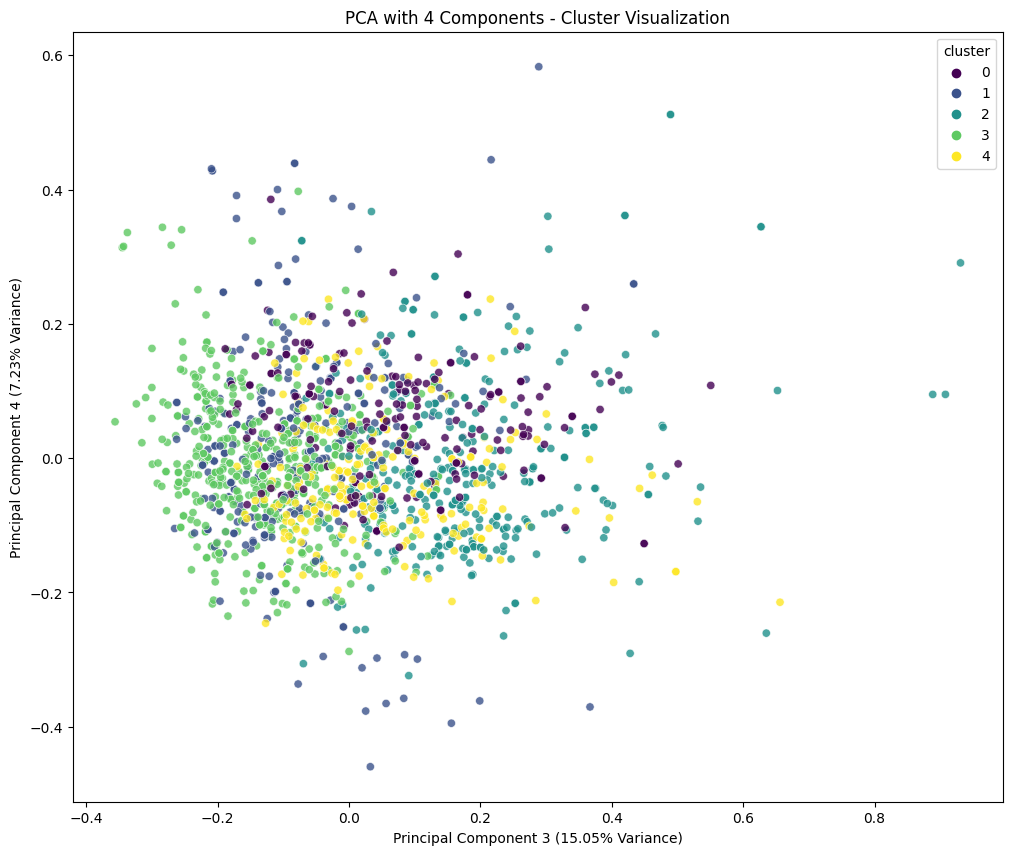

In [ ]:
# Visualize the clusters with the 3rd and 4th principal components
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC3', y='PC4', hue='cluster', data=wine, palette='viridis', legend='full', alpha=0.8)
plt.title(f'PCA with {n_components_pca} Components - Cluster Visualization')
plt.xlabel(f'Principal Component 3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 4 ({pca.explained_variance_ratio_[3]*100:.2f}% Variance)')
plt.show()